In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# Copyright © Simphony Project Contributors
# Licensed under the terms of the MIT License
# (see simphony/__init__.py for details)

import os
import sys
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from SiPANN import scee_simp
from simphony.library import ebeam
from simphony.netlist import Subcircuit
from simphony.simulation import SweepSimulation

In [2]:
def pltAttr(x, y, title=None, legend='upper right', save=None):
    if legend is not None:
        plt.legend(loc=legend)
    plt.xlabel(x)
    plt.ylabel(y)
    if title is not None:
        plt.title(title)
    if save is not None:
        plt.savefig(save)

In [3]:
# Have rings for selecting out frequencies from the data line.
radius = 10
half_ring = scee_simp.HalfRing(radius=radius)
term = ebeam.ebeam_terminator_te1550()

circuit = Subcircuit()
circuit.add([
    (half_ring, 'input'),
    (half_ring, 'output'),
    (term, 'terminator')
])

circuit.elements['input'].pins = ('pass', 'midb', 'in', 'midt')
circuit.elements['output'].pins = ('out', 'midt', 'term', 'midb')

circuit.connect_many([
    ('input', 'midb', 'output', 'midb'),
    ('input', 'midt', 'output', 'midt'),
    ('terminator', 'n1', 'output', 'term')
])

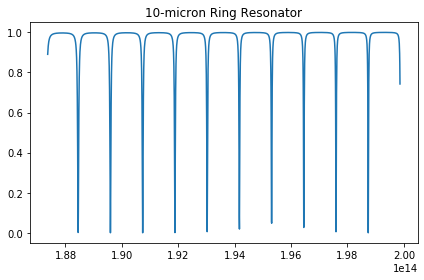

In [4]:
# Behold, we can run a simulation on a single ring resonator.
sim1 = SweepSimulation(circuit, 1500e-9, 1600e-9)
res1 = sim1.simulate()

f1, s = res1.data(res1.pinlist['in'], res1.pinlist['pass'])
plt.plot(f1, s)
plt.title("10-micron Ring Resonator")
plt.tight_layout()
plt.show()